# <span style="color:#336699">Web Crop Phenology Metrics Service (WCPMS) Region</span>
<hr style="border:2px solid #0077b9;">

<div style="text-align: left;">
    <a href="https://nbviewer.jupyter.org/github/brazil-data-cube/code-gallery/"><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" align="center"/></a>
</div>

<br/>

<div style="text-align: center;font-size: 90%;">
    Gabriel Sansigolo<sup><a href="https://orcid.org/0000-0003-0789-5858"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    Earth Observation and Geoinformatics Division, National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact: <a href="mailto:brazildatacube@inpe.br">brazildatacube@inpe.br</a>
    <br/><br/>
    Last Update: June 14, 2024
</div>

<br/>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Abstract.</b> This Jupyter Notebook explains how to use the WCPMS service to extract phenology metrics on regions from <em>Earth Observation Data Cubes</em>.
</div>

<br/>
<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;font-size: 75%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>This Jupyter Notebook is a supplement to the following paper:</b>
    <div style="margin-left: 10px; margin-right: 10px">
    Sansigolo, G.; Queiroz, G. R.; Ferreira, K. R.; Adami, M.; Körting, T.<a href="http://www.google.com" target="_blank">A Web Service for Crop Sowing and Harvesting Detection from Earth Observation Data Cubes.
    </div>
</div>

# Introduction
<hr style="border:1px solid #0077b9;">

The Web Crop Phenology Metrics Service (WCPMS) is open-source web service for calculating phenological metrics based on the Earth Observation Data from the Brazil Data Cube (BDC). It will allow users to easily calculate phenological metrics from data cubes without downloading big EO datasets to their personal computers. 

The software will run on the server side, so it doesn't require any package installation or user programming skills to use it. By giving a point or a region it will retrieve the phenological metrics associated with spatial locations by calculating it using time series.

WCPMS API is composed of four operations:

- ``list_collections``: returns in list form the unique identifier of each of the data cubes available in the BDC's SpatioTemporal Asset Catalogs (STAC).

- ``describe``: returns in dictionary format the information on each of the phenology metrics, such as code, name, description and method. 	

- ``phenometrics``: returns in dictionary form all the phenological metrics calculated for the given spatial location. 

- ``phenometrics (region)``: returns in list form  dictionary with the phenological metrics calculated for each of the given spatial location based on selected region methodology (all, systematic grid or random grid).

This Jupyter Notebook shows how to use WCPMS in Python.

## Web Service
<hr style="border:1px solid #0077b9;">


The architecture of the proposed web service is made up of two sides: (1) the server-side and (2) the client-side. It will allow users to calculate phenological metrics from data cubes without needing to download big EO datasets to their personal computers. The web service, run on the server-side, so everything related to it, such as the libraries for calculating phenological metrics, the access to the web service for extracting time series (WTSS), is on the cloud, so it doesn't require any package installation or user programming skills to use it. 

The WCPMS is an open-source web service for calculating phenological metrics based on the Earth Observation Data from the Brazil Data Cube (BDC), as illustrated in Figure 1. Through a simple API, users indicate a spatial location or region and the WCPMS will retrieve the phenological metrics associated with spatial locations by calculating it using time series.

<div align="center">
    <figcaption><strong>Figure 1</strong> - Web Crop Phenology Metrics Service (WCPMS) retrieving the Start of Season (SOS), End of Season (EOS), Valley of Season (VOS), Peak of Season (POS) and Length of Season (LOS) associated to a spatial location </figcaption>
    <img src="https://github.com/brazil-data-cube/wcpms.py/blob/master/images/wcpms_work.png?raw=true" align="center" width="768"/>
    <br>
</div>


# Python Client API
<hr style="border:1px solid #0077b9;">

For running the examples in this Jupyter Notebook you will need to install the [WCPMS client for Python](https://github.com/brazil-data-cube/wcpms.py). To install it from PyPI using `pip`, use the following command:

In [1]:
#!pip install git+https://github.com/brazil-data-cube/wcpms.py

In order to access the funcionalities of the client API, you should import the `wcpms` package and `os` package, as follows:

In [2]:
import os
from wcpms import *

After that, you should add the `wcpms` service url:

In [3]:
wcpms_url = 'http://127.0.0.1:5000' #'http://data.inpe.br/bdc/wcpms' 

The above cell will create an string named `service` that will save the wcpms url for future use.

# Creating a Data Cube Query
<hr style="border:1px solid #0077b9;">

To make it easier to use, there is a function to create a data cube query called `cube_query`:

In [4]:
datacube=cube_query(
    collection="S2-16D-2",
    start_date="2022-01-01",
    end_date="2022-12-31",
    freq="16D",
    band="NDVI"
)

# Opening a shapefile to select a region
<hr style="border:1px solid #0077b9;">

To easily open a shapefile you can use the geopandas (gpd) contained in the wcpms library, there is a function called `gpd_shapefile`:

In [5]:
path_dir = os.path.dirname("")

In [6]:
polygon = gpd_shapefile(os.path.join(path_dir, "shp/GLEBA_90823.shp"))

polygon

,GLEBA_GID,REF_BACEN,NU_ORDEM,NU_INDICE,DATA_EMISS,AREA_GLEBA,PERIMETRO_,AREA_MENOR,AREA_ME_01,PRODUTO,PROAGRO_EV,PROAGRO_ST,geometry
0,90823.0,515439159,1,0,2023-02-13,430133.752674,2789.87208,510114.773209,863178.683342,trigo,chuva excessiva,deferida,"POLYGON ((-53.8895 -27.64728, -53.89079 -27.64..."


# Retrieving the Phenological Metrics for Region
<hr style="border:1px solid #0077b9;">

In order to retrieve the phenological metrics associated with a region, it's necessary to define a region methodology (`all`, `systematic` or `random`), with that the metrics are calculated using time series `NDVI`, for each of the given spatial location from `January 1st, 2022` to `December 31st, 2022`, use the `get_phenometrics_region` function:

In [7]:
pms=get_phenometrics_region(
    url=wcpms_url,
    cube=datacube,
    geom=gdf_to_geojson(polygon["geometry"]),
    method="systematic",
	distance="0.02"
)

In [ ]:
pms

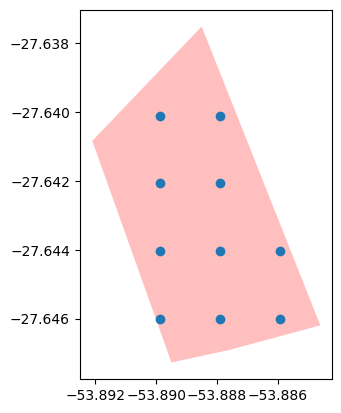

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt

x, y = [],[]
for p in pms:
    x.append(p["point"][0])
    y.append(p["point"][1])
gpd.GeoSeries(polygon["geometry"]).plot(color='red', alpha=0.25)
plt.scatter(x,y) 
plt.show() 

# References
<hr style="border:1px solid #0077b9;">

# See also the following Jupyter Notebooks
<hr style="border:1px solid #0077b9;">

* [WTSS Examples](./wtss-examples.ipynb)